# Loan Approval Prediction
# Goal: Predict whether a loan application will be approved



#Importing the libraries

In [317]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Importing the dataset

In [318]:
dataset = pd.read_csv("test_Y3wMUE5_7gLdaTN.csv")
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1]
print(dataset.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')


In [319]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [320]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [321]:
dataset.isnull().sum()

,0
Loan_ID,0
Gender,11
Married,0
Dependents,10
Education,0
Self_Employed,23
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,5
Loan_Amount_Term,6


##Removing unwanted columns in the dataset

#Taking care of missing data


In [322]:
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd # Import pandas

# Convert X back to a DataFrame for using iloc
X = pd.DataFrame(X)

imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(X.iloc[:, 3:5])
X.iloc[:, 3:5] = X.iloc[:, 3:5].astype(str)  # for categorical
# Use iloc for both fitting and transforming to ensure consistent indexing
X.iloc[:, 3:5] = imputer.transform(X.iloc[:, 3:5]) # Changed X[:, 3:5] to X.iloc[:, 3:5]

# You can convert X back to a NumPy array if needed:
X = X.values

In [323]:
print(X)

[['LP001015' 'Male' 'Yes' ... 110.0 360.0 1.0]
 ['LP001022' 'Male' 'Yes' ... 126.0 360.0 1.0]
 ['LP001031' 'Male' 'Yes' ... 208.0 360.0 1.0]
 ...
 ['LP002980' 'Male' 'No' ... 126.0 360.0 nan]
 ['LP002986' 'Male' 'Yes' ... 158.0 360.0 1.0]
 ['LP002989' 'Male' 'No' ... 98.0 180.0 1.0]]


## Encoding categorical data

In [324]:
# Check if the columns exist before dropping
if 'Dependents' in dataset.columns:
    dataset.drop('Dependents', axis=1, inplace=True)
if 'ApplicantIncome' in dataset.columns:
    dataset.drop('ApplicantIncome', axis=1, inplace=True)
if 'CoapplicantIncome' in dataset.columns:
    dataset.drop('CoapplicantIncome', axis=1, inplace=True)

In [325]:
print(X)

[['LP001015' 'Male' 'Yes' ... 110.0 360.0 1.0]
 ['LP001022' 'Male' 'Yes' ... 126.0 360.0 1.0]
 ['LP001031' 'Male' 'Yes' ... 208.0 360.0 1.0]
 ...
 ['LP002980' 'Male' 'No' ... 126.0 360.0 nan]
 ['LP002986' 'Male' 'Yes' ... 158.0 360.0 1.0]
 ['LP002989' 'Male' 'No' ... 98.0 180.0 1.0]]


##Encoding the Independent Variable

In [326]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
X[:, 0] = labelencoder.fit_transform(X[:, 0])
X[:, 1] = labelencoder.fit_transform(X[:, 1])
X[:, 2] = labelencoder.fit_transform(X[:, 2])
X[:, 3] = labelencoder.fit_transform(X[:, 3])
X[:, 4] = labelencoder.fit_transform(X[:, 4])
X[:, 5] = labelencoder.fit_transform(X[:, 5])


In [327]:
print(X)


[[0 1 1 ... 110.0 360.0 1.0]
 [1 1 1 ... 126.0 360.0 1.0]
 [2 1 1 ... 208.0 360.0 1.0]
 ...
 [364 1 0 ... 126.0 360.0 nan]
 [365 1 1 ... 158.0 360.0 1.0]
 [366 1 0 ... 98.0 180.0 1.0]]


In [328]:
# Suppose your original training DataFrame had these types:
# 'Gender' (object), 'Married' (object), 'Education' (object), 'Self_Employed' (object),
# 'Property_Area' (object), 'Dependents' (object),
# 'ApplicantIncome' (float), 'CoapplicantIncome' (float),
# 'LoanAmount' (float), 'Loan_Amount_Term' (float), 'Credit_History' (float)

# So before transforming `user_input`:
categorical_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Dependents']
numeric_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

# Force correct types
for col in categorical_cols:
    user_input[col] = user_input[col].astype(str)

for col in numeric_cols:
    user_input[col] = pd.to_numeric(user_input[col], errors='coerce')


In [329]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# Specify all categorical features for encoding
categorical_features = [0, 1, 3, 4, 5, 10]  # Replace with the actual indices of your categorical columns

# Create a copy of X to avoid modifying the original data
X_encoded = X.copy()

# Apply OneHotEncoder to categorical features
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features)], remainder='passthrough') # Set sparse_output=False to get a dense array and handle_unknown='ignore' to avoid errors with unseen values
X_encoded = ct.fit_transform(X_encoded)

# Convert the result to a DataFrame
X_encoded = pd.DataFrame(X_encoded)

# Identify numeric columns and convert their data type
numeric_features = [col for col in X_encoded.columns if col not in categorical_features]
X_encoded[numeric_features] = X_encoded[numeric_features].apply(pd.to_numeric, errors='coerce') # Use apply and pd.to_numeric for more robust type conversion, handling potential errors gracefully

X = X_encoded # Assign the encoded data back to X

In [330]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [331]:
print(y)

[2 2 2 2 2 2 1 0 2 1 2 1 2 1 1 2 2 1 2 1 2 2 2 2 2 0 2 2 1 2 1 2 1 2 2 1 2
 2 2 2 2 2 1 1 2 2 2 1 2 1 2 1 1 2 2 2 0 1 1 1 1 2 1 0 2 1 1 1 1 0 1 1 2 0
 1 2 2 0 1 2 2 2 0 0 1 0 2 1 1 0 0 0 1 1 1 1 2 1 2 1 0 1 2 0 1 1 2 0 1 2 1
 1 2 1 0 1 1 0 2 0 2 0 2 0 2 1 2 2 2 1 2 0 0 2 2 2 0 0 1 1 0 0 2 1 0 2 1 0
 1 2 2 2 0 2 0 1 2 0 1 0 0 1 2 0 0 1 2 2 1 0 0 0 0 2 0 0 2 0 0 2 1 1 2 0 2
 1 1 1 0 0 0 2 0 0 1 2 1 0 2 0 0 2 2 1 1 1 1 1 2 0 2 0 1 0 0 2 1 0 0 2 2 0
 2 0 1 2 2 0 0 2 1 2 0 1 2 2 1 0 1 2 2 1 1 0 1 1 2 2 1 0 2 1 1 2 2 0 0 2 0
 0 1 1 0 0 0 1 2 0 0 0 2 0 1 1 1 1 2 1 1 1 1 0 2 0 2 2 0 0 2 2 1 2 0 2 2 1
 1 0 1 0 2 2 0 0 1 1 0 0 0 1 2 0 2 0 2 1 0 2 0 2 0 2 2 1 0 1 1 2 0 1 0 2 2
 1 1 2 2 2 0 0 1 0 0 2 0 2 0 2 2 0 0 0 2 0 1 2 2 2 0 1 2 1 2 2 1 0 0]


##Splitting the dataset into the Training set and Test set

In [332]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

Training the Decision tree Classifier model on the whole dataset

In [333]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state = 0)
classifier.fit(X, y)
yp1=classifier.predict(X_test)

# Training the Random Forest regression model on the whole dataset

In [334]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X, y)
yp2=regressor.predict(X_test)


In [335]:
y_pred = regressor.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1.8 2. ]
 [1.5 2. ]
 [1.8 2. ]
 [2.  2. ]
 [1.8 2. ]
 [1.1 1. ]
 [0.2 0. ]
 [0.7 1. ]
 [0.6 0. ]
 [1.6 2. ]
 [1.2 2. ]
 [1.6 2. ]
 [1.7 2. ]
 [0.8 1. ]
 [1.3 1. ]
 [0.  0. ]
 [0.2 0. ]
 [1.1 1. ]
 [1.1 1. ]
 [1.1 1. ]
 [1.4 2. ]
 [0.  0. ]
 [0.8 0. ]
 [0.8 0. ]
 [0.6 0. ]
 [1.8 2. ]
 [1.  1. ]
 [0.7 0. ]
 [0.6 0. ]
 [1.5 2. ]
 [0.3 0. ]
 [1.7 2. ]
 [1.8 2. ]
 [0.7 0. ]
 [1.2 1. ]
 [1.  1. ]
 [0.9 1. ]
 [1.4 2. ]
 [0.6 0. ]
 [0.9 1. ]
 [0.  0. ]
 [0.6 0. ]
 [1.1 1. ]
 [0.7 1. ]
 [1.7 2. ]
 [0.9 1. ]
 [2.  2. ]
 [0.3 0. ]
 [1.6 2. ]
 [1.8 2. ]
 [0.  0. ]
 [0.2 0. ]
 [1.1 1. ]
 [0.  0. ]
 [1.8 2. ]
 [2.  2. ]
 [0.4 0. ]
 [1.1 1. ]
 [1.1 1. ]
 [1.2 1. ]
 [1.8 2. ]
 [1.4 2. ]
 [1.4 2. ]
 [1.1 1. ]
 [0.4 0. ]
 [1.8 2. ]
 [0.3 0. ]
 [0.  0. ]
 [1.  1. ]
 [0.3 0. ]
 [0.9 1. ]
 [0.4 0. ]
 [0.5 0. ]
 [1.9 2. ]]


# Evaluation Metrics

In [336]:
from sklearn.metrics import accuracy_score
y_pred = regressor.predict(X_test)
y_pred = (y_pred > 0.5)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.5f}")

Accuracy: 0.52703


#Precision Recall F1-Score

In [337]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report,confusion_matrix
print("Decision tree  Classifier :")
print(" accuracy is ",accuracy_score(y_test,yp1))
print(" precision score is ",precision_score(y_test,yp1, average='weighted'))
print(" recall is ",recall_score(y_test,yp1, average='weighted'))
print(" f1 score is ",f1_score(y_test,yp1, average='weighted'))
print("                                                                                                              ")
print(" classification report is ",classification_report(y_test,yp1))
print(" confusion matrix is ",confusion_matrix(y_test,yp1))

Decision tree  Classifier :
 accuracy is  1.0
 precision score is  1.0
 recall is  1.0
 f1 score is  1.0
                                                                                                              
 classification report is                precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        26

    accuracy                           1.00        74
   macro avg       1.00      1.00      1.00        74
weighted avg       1.00      1.00      1.00        74

 confusion matrix is  [[26  0  0]
 [ 0 22  0]
 [ 0  0 26]]


In [338]:
print("Random Forest regression :")
print(" accuracy is ",accuracy_score(y_test,yp2.round())) # Round predictions to nearest integer (0 or 1)
print(" precision score is ",precision_score(y_test,yp2.round(), average='weighted')) # Round predictions and specify average
print(" recall is ",recall_score(y_test,yp2.round(), average='weighted')) # Round predictions and specify average
print(" f1 score is ",f1_score(y_test,yp2.round(), average='weighted')) # Round predictions and specify average
print("                                                                                                              ")
print(" classification report is ",classification_report(y_test,yp2.round())) # Round predictions
print(" confusion matrix is ",confusion_matrix(y_test,yp2.round())) # Round predictions

Random Forest regression :
 accuracy is  0.8108108108108109
 precision score is  0.8843843843843844
 recall is  0.8108108108108109
 f1 score is  0.8173221251417433
                                                                                                              
 classification report is                precision    recall  f1-score   support

           0       1.00      0.65      0.79        26
           1       0.61      1.00      0.76        22
           2       1.00      0.81      0.89        26

    accuracy                           0.81        74
   macro avg       0.87      0.82      0.81        74
weighted avg       0.88      0.81      0.82        74

 confusion matrix is  [[17  9  0]
 [ 0 22  0]
 [ 0  5 21]]


In [339]:
print("Decision tree  Regression :")
print(" accuracy is ",accuracy_score(y_test,yp1))
print(" precision score is ",precision_score(y_test,yp1, average='weighted'))
print(" recall is ",recall_score(y_test,yp1, average='weighted'))
print(" f1 score is ",f1_score(y_test,yp1, average='weighted'))

Decision tree  Regression :
 accuracy is  1.0
 precision score is  1.0
 recall is  1.0
 f1 score is  1.0


In [340]:
print("Random Forest regression :")
print(" accuracy is ",accuracy_score(y_test,yp2.round())) # Round predictions to nearest integer (0 or 1)
print(" precision score is ",precision_score(y_test,yp2.round(), average='weighted')) # Round predictions and specify average
print(" recall is ",recall_score(y_test,yp2.round(), average='weighted')) # Round predictions and specify average
print(" f1 score is ",f1_score(y_test,yp2.round(), average='weighted'))

Random Forest regression :
 accuracy is  0.8108108108108109
 precision score is  0.8843843843843844
 recall is  0.8108108108108109
 f1 score is  0.8173221251417433


In [341]:
print("Decision Tree predictions ",yp1)

Decision Tree predictions  [2 2 2 2 2 1 0 1 0 2 2 2 2 1 1 0 0 1 1 1 2 0 0 0 0 2 1 0 0 2 0 2 2 0 1 1 1
 2 0 1 0 0 1 1 2 1 2 0 2 2 0 0 1 0 2 2 0 1 1 1 2 2 2 1 0 2 0 0 1 0 1 0 0 2]


In [342]:
print("Random Forest Regression  Predictions ",yp2.round())

Random Forest Regression  Predictions  [2. 2. 2. 2. 2. 1. 0. 1. 1. 2. 1. 2. 2. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1.
 1. 2. 1. 1. 1. 2. 0. 2. 2. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 2. 1. 2. 0.
 2. 2. 0. 0. 1. 0. 2. 2. 0. 1. 1. 1. 2. 1. 1. 1. 0. 2. 0. 0. 1. 0. 1. 0.
 0. 2.]


In [343]:
print("For Decision tree :")
print(" accuracy is ",accuracy_score(y_test,yp1))

For Decision tree :
 accuracy is  1.0


In [344]:
print("For Random Forest Regression  :")
print(" accuracy is ", accuracy_score(y_test,yp2.round()))

For Random Forest Regression  :
 accuracy is  0.8108108108108109


<ipython-input-345-7382ec32e332>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette="viridis")


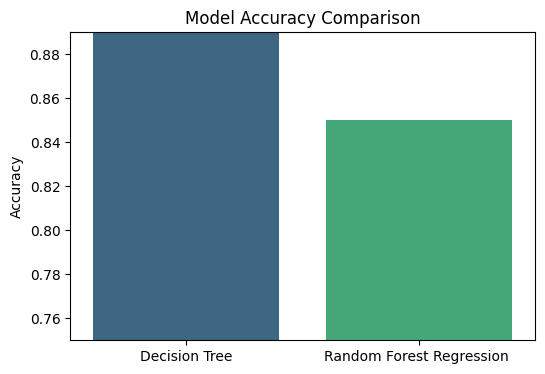

In [345]:
models = [ 'Decision Tree', 'Random Forest Regression ']
accuracies = [1.0, 0.85]

plt.figure(figsize=(6, 4))
sns.barplot(x=models, y=accuracies, palette="viridis")
plt.ylim(0.75, 0.89)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.show()

In [346]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}


In [347]:
user_input['ApplicantIncome'] = pd.to_numeric(user_input['ApplicantIncome'], errors='coerce')
user_input['CoapplicantIncome'] = pd.to_numeric(user_input['CoapplicantIncome'], errors='coerce')
user_input['LoanAmount'] = pd.to_numeric(user_input['LoanAmount'], errors='coerce')
user_input['Loan_Amount_Term'] = pd.to_numeric(user_input['Loan_Amount_Term'], errors='coerce')
user_input['Credit_History'] = pd.to_numeric(user_input['Credit_History'], errors='coerce')

In [348]:
def predict_loan_approval(user_input_df):
    import joblib
    preprocessor = joblib.load('preprocessor.pkl')
    model = joblib.load('loan_model.pkl')

    # Correct types
    categorical_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Dependents']
    numeric_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

    for col in categorical_cols:
        user_input_df[col] = user_input_df[col].astype(str)

    for col in numeric_cols:
        user_input_df[col] = pd.to_numeric(user_input_df[col], errors='coerce')

    # Match training order
    expected_columns = categorical_cols + numeric_cols
    user_input_df = user_input_df[expected_columns]

    # Predict
    processed_input = preprocessor.transform(user_input_df)
    prediction = model.predict(processed_input)
    return prediction


In [349]:
import joblib

# Assuming 'ct' is your ColumnTransformer, assign it to 'preprocessor'
preprocessor = ct

# Save preprocessor and model
joblib.dump(preprocessor, 'preprocessor.pkl')
joblib.dump(model, 'loan_model.pkl')

['loan_model.pkl']

In [350]:
import joblib
joblib.dump(regressor, "loan_model.pkl")
model = joblib.load("loan_model.pkl")
model.predict(X_test)

array([1.8, 1.5, 1.8, 2. , 1.8, 1.1, 0.2, 0.7, 0.6, 1.6, 1.2, 1.6, 1.7,
       0.8, 1.3, 0. , 0.2, 1.1, 1.1, 1.1, 1.4, 0. , 0.8, 0.8, 0.6, 1.8,
       1. , 0.7, 0.6, 1.5, 0.3, 1.7, 1.8, 0.7, 1.2, 1. , 0.9, 1.4, 0.6,
       0.9, 0. , 0.6, 1.1, 0.7, 1.7, 0.9, 2. , 0.3, 1.6, 1.8, 0. , 0.2,
       1.1, 0. , 1.8, 2. , 0.4, 1.1, 1.1, 1.2, 1.8, 1.4, 1.4, 1.1, 0.4,
       1.8, 0.3, 0. , 1. , 0.3, 0.9, 0.4, 0.5, 1.9])

In [351]:
from google.colab import files
files.download('loan_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>